### Regex

In [9]:
import re
import os 
import regex 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt


### Task 1, 2:

In [10]:
addition = "dodaje\ssię\s[a-zA-Z]{2,4}\."
removal = ".*skreśla\ssię"
change = ".*otrzymuje\sbrzmienie"

dateregex = "z\sdnia.*\sr\.|z\sdnia.*\n[1,2][0-9]{3}\sr\.|z\sdnia\s.*\n.*[1,2][0-9]{3}\sr.|z.*\ndnia.*\sr\.|z\sdnia.*\nr\."

data_array = np.empty((0, 5), int)

for i in os.listdir(path="ustawy"):
    try: 
        with open("ustawy/"+i, "r") as f:
            data = f.read()
    except TimeoutError:
        print("TimeoutError:", i)

    date = re.findall(dateregex, data)
    add = re.findall(addition, data)
    rem = re.findall(removal, data)
    cha = re.findall(change, data)

    if len(date) == 0:
        print("no date found in file:", i)

        # file 1996_400.txt has no electronic form

    else:
        #print("date:", int(date[0].split()[-2]))
        #print(i, ":", len(add), add)
        #print(i, ": ", len(rem), rem)
        #print(i, ": ", len(change), cha)
        row = np.array([[int(date[0].split()[-2]), len(add), len(rem), len(cha), len(add)+len(rem) +len(cha)]])
        #print(row)

        data_array = np.append(data_array, row, axis=0)
    
    f.close()
    
#print(data_array)


no date found in file: 1996_400.txt


In [11]:
df = pd.DataFrame(data_array, columns=['year', 'addition', 'removal', 'change', 'sum'])
grouped = df.groupby('year', as_index=False).sum()

df.groupby('year', as_index=False).sum()


,year,addition,removal,change,sum
0,1993,25,25,64,114
1,1994,66,52,75,193
2,1995,193,148,349,690
3,1996,204,281,501,986
4,1997,321,267,689,1277
5,1998,390,459,922,1771
6,1999,152,121,251,524
7,2000,693,663,1467,2823
8,2001,898,598,1466,2962
9,2002,8,8,30,46


### Task 3:

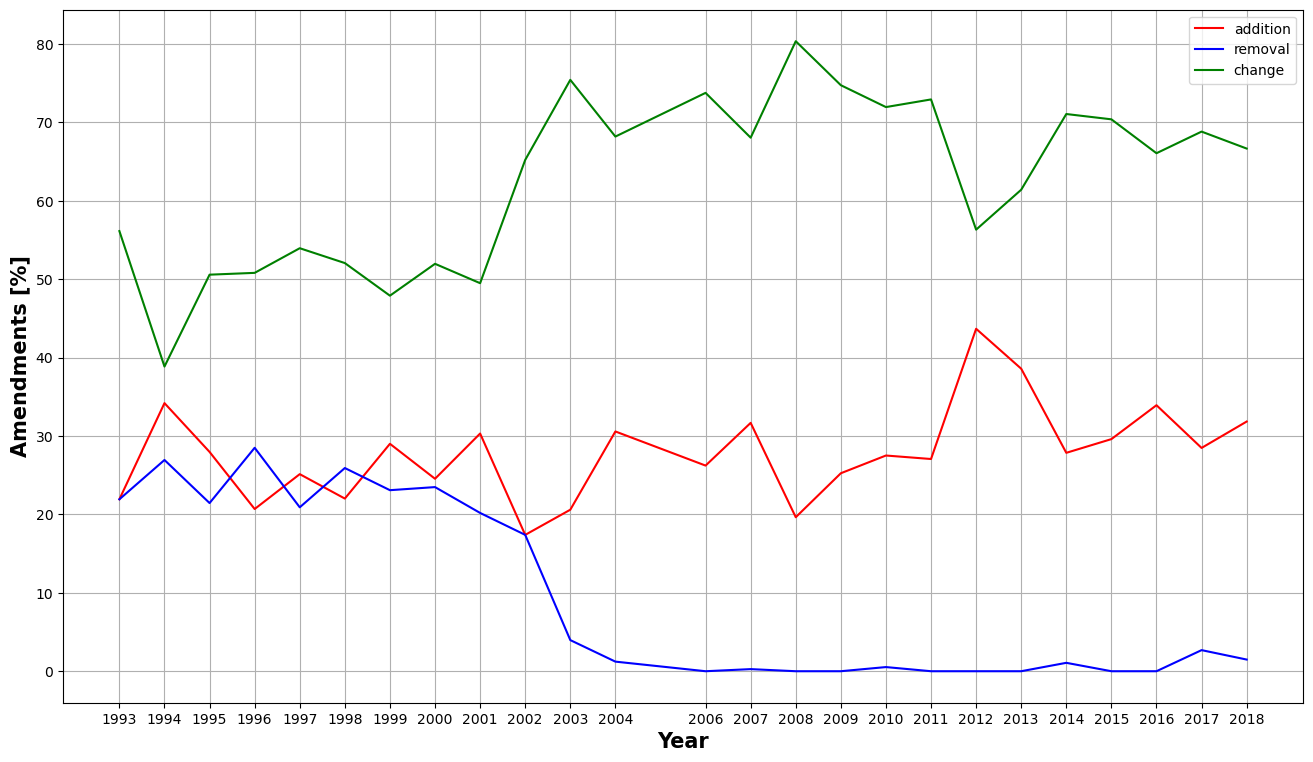

In [12]:
from cProfile import label
from turtle import color

plt.figure(figsize=(16,9))
plt.plot(grouped['year'],((grouped['addition']/grouped['sum'])*100), label='addition', color='r')
plt.plot(grouped['year'],((grouped['removal']/grouped['sum'])*100), label='removal', color='b')
plt.plot(grouped['year'],((grouped['change']/grouped['sum'])*100), label='change', color='g')

plt.xticks(grouped['year'])
plt.grid( which='major', axis='x')
plt.grid(which='both', axis='y')

plt.xlabel('Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Amendments [%]', fontweight ='bold', fontsize = 15)


plt.legend()
plt.show()


### Task 4, 5, 6, 7:

In [17]:
lemat_regex = "(?i)ustaw(?:a|y|om|ę|ą|ach|ie|o|ach|ami|)[\s+.]"
lemat_z_dnia_regex = "(?i)ustaw(?:a|y|om|ę|ą|ach|ie|o|ach|ami|)\s+z\sdnia"
lemat_bez_z_dnia_regex = "(?i)ustaw(?:a|y|om|ę|ą|ach|ie|o|ach|ami|)\s+(?!z\sdnia).*[\s+.]"
lemat_o_zmianie = "(?<!\so\szmianie)\sustaw(?:a|y|om|ę|ą|ach|ie|o|ach|ami|)[\s+.]"

ustaw_array = np.empty((0, 5), int)

count_ustaw = 0
count_ustaw_z_dnia = 0
count_ustaw_bez_z_dnia = 0
count_ustaw_o_zmianie = 0

for i in os.listdir(path="ustawy"):
    try: 
        with open("ustawy/"+i, "r") as f:
            data = f.read()
    except TimeoutError:
        print("TimeoutError:", i)

    ustaws = re.findall(lemat_regex, data)
    ustaws_z_dnia = re.findall(lemat_z_dnia_regex, data)
    ustaws_bez_z_dnia = re.findall(lemat_bez_z_dnia_regex, data)
    ustaws_o_zmianie = re.findall(lemat_o_zmianie, data)


    # print("ustawa:", len(ustaws), ustaws)
    # print("ustawa z dnia:", len(ustaws_z_dnia), ustaws_z_dnia)
    # print("ustawa bez z dnia:", len(ustaws_bez_z_dnia), ustaws_bez_z_dnia)

    count_ustaw+=len(ustaws)
    count_ustaw_z_dnia+=len(ustaws_z_dnia)
    count_ustaw_bez_z_dnia+=len(ustaws_bez_z_dnia)
    count_ustaw_o_zmianie+=len(ustaws_o_zmianie)

    f.close()

print("ustawa:", count_ustaw)
print("ustawa with 'z dnia':", count_ustaw_z_dnia)
print("ustawa without 'z dnia':", count_ustaw_bez_z_dnia)
print("Sum of task 5 and 6:", count_ustaw_z_dnia+count_ustaw_bez_z_dnia)
print("Ustawa without 'o zmianie':", count_ustaw_o_zmianie)


ustawa: 21375
ustawa with 'z dnia': 8427
ustawa without 'z dnia': 11677
Sum of task 5 and 6: 20104
Ustawa without 'o zmianie': 17735


### Task 8:

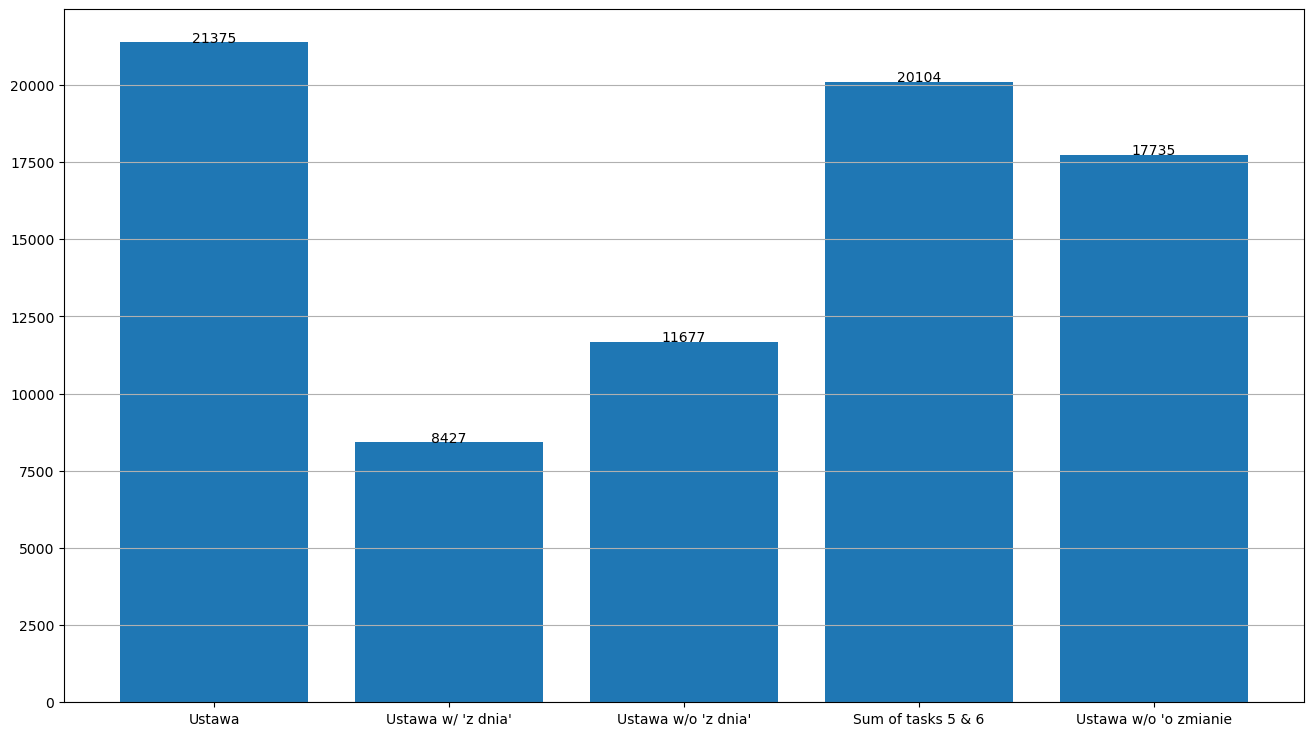

In [18]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

data = {"Ustawa": count_ustaw, 
    "Ustawa w/ 'z dnia'": count_ustaw_z_dnia,
    "Ustawa w/o 'z dnia'": count_ustaw_bez_z_dnia,
    "Sum of tasks 5 & 6": count_ustaw_bez_z_dnia+count_ustaw_z_dnia,
    "Ustawa w/o 'o zmianie": count_ustaw_o_zmianie}


X = list(data.keys())
Y = list(data.values())

plt.figure(figsize=(16,9))

plt.bar(X, Y)
addlabels(X, Y)

plt.grid(which='both', axis='y')
plt.show()
